In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import nbinom
from tqdm.notebook import trange, tqdm
import seaborn as sns 
import pandas as pd
import scipy.stats as stats
from scipy.optimize import curve_fit

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Helvetica"]})

plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)

from matplotlib import cm, colors, colorbar
cmap = cm.get_cmap('viridis_r')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Function to scale-up the colormap regarding the age of the individual
def trans(x):
    a = 18/57
    b = 1
    return (x-a)/(b-a)

In [3]:
NreadsP3 = 1021398
NreadsP4 = 1792178
NreadsP6beta = 754739
NreadsP9 = 616835

In [4]:
## Results of the inference for S1, S2, MPbeta, MPalpha, YB
###P3
A_P3 = np.array([-0.31402038, -0.31402038, -0.27625993, -0.2567954 , -0.23052102,
       -0.2251288 , -0.23053352, -0.25110638, -0.28754419, -0.3609712 ,
       -0.46874922, -0.57265123, -0.60609602, -0.53379117])
A_P3_err = np.array([0.03010724, 0.03010724, 0.02885052, 0.02938364, 0.02856642,
       0.02866415, 0.03365785, 0.03225998, 0.03837605, 0.05427912,
       0.09668126, 0.1135252 , 0.15082407, 0.11357856])
B_P3 = np.array([0.20939261, 0.20939261, 0.21690351, 0.22393034, 0.23294158,
       0.2402579 , 0.25172744, 0.28241968, 0.3537332 , 0.47468435,
       0.66777199, 0.8346176 , 0.8789646 , 0.83831288])
B_P3_err = np.array([0.02419785, 0.02419785, 0.02613197, 0.02530497, 0.03086372,
       0.03541774, 0.0348638 , 0.04664989, 0.0694717 , 0.10337856,
       0.1995851 , 0.16047709, 0.20008823, 0.13579055])

###P4
A_P4 = np.array([-0.33899975, -0.30272089, -0.26214746, -0.24277183, -0.23834802,
       -0.22568074, -0.25099427, -0.32360902, -0.34902087, -0.43101271,
       -0.52035608, -0.83375736, -0.83241119, -0.62396399])
A_P4_err = np.array([0.0085284 , 0.00791802, 0.00449601, 0.00912208, 0.00515741,
       0.01514763, 0.02773582, 0.04871143, 0.01932869, 0.03780793,
       0.0277149 , 0.08536917, 0.06369186, 0.25750091])

B_P4 = np.array([0.45074493, 0.46225775, 0.46967356, 0.4758764 , 0.49529015,
       0.48245649, 0.5418097 , 0.87944082, 0.98517916, 1.0542311 ,
       1.21886515, 1.47785786, 1.33087599, 1.22611019])
B_P4_err = np.array([0.01145982, 0.00805639, 0.01224395, 0.01953588, 0.00780943,
       0.02658801, 0.03595823, 0.17410984, 0.09481136, 0.05435831,
       0.21137076, 0.37766387, 0.28862259, 0.18677284])

###P6 beta
A_P6_beta = np.array([-0.14707124, -0.14707124, -0.11534869, -0.08613379, -0.08255328,
       -0.09177318, -0.10297632, -0.10008767, -0.08187944, -0.04767768,
       -0.04188368,  0.02018629,  0.02693291, -0.00238157])
A_P6_beta_err = np.array([0.04860392, 0.04860392, 0.01076118, 0.00829211, 0.00547916,
       0.00378921, 0.00363806, 0.00962537, 0.01078864, 0.01293259,
       0.01378962, 0.02050525, 0.00927396, 0.00719821])

B_P6_beta = np.array([0.1409258 , 0.1409258 , 0.19709249, 0.19622967, 0.20407467,
       0.21164949, 0.22917316, 0.25016793, 0.26955572, 0.25476055,
       0.23725685, 0.16225359, 0.11834641, 0.1047153 ])
B_P6_beta_err = np.array([0.08279192, 0.08279192, 0.02995125, 0.03153803, 0.03144363,
       0.0264483 , 0.02672435, 0.02587421, 0.03005633, 0.04051904,
       0.04361805, 0.04208993, 0.02141383, 0.0179099 ])

###P6 alpha
A_P6_alpha = np.array([-0.1247948 , -0.09905249, -0.08891382, -0.0873424 , -0.08732188,
       -0.08513647, -0.08197841, -0.05923807, -0.02638299,  0.01387177,
        0.05756348,  0.10339188,  0.1064932 ,  0.10130882])

A_P6_alpha_err = np.array([0.00689288, 0.01060347, 0.01087509, 0.01169527, 0.0081088 ,
       0.01037073, 0.0119971 , 0.0126808 , 0.01374629, 0.01224552,
       0.01711305, 0.01562535, 0.01152943, 0.00875642])

B_P6_alpha = np.array([0.16655104, 0.16866091, 0.173838  , 0.18420626, 0.19626572,
       0.21766389, 0.23922646, 0.24558271, 0.23467734, 0.1908341 ,
       0.15612782, 0.12121458, 0.10963785, 0.09227638])
B_P6_alpha_err = np.array([0.01702224, 0.01976717, 0.01949749, 0.02086341, 0.02224078,
       0.02538924, 0.03119845, 0.03608516, 0.04459864, 0.0324551 ,
       0.03078455, 0.03266058, 0.02095319, 0.01003768])

###P9
A_P9 = np.array([-0.11728954, -0.04835404, -0.01823364, -0.02163358, -0.0207305 ,
       -0.02923776, -0.03938855, -0.05070962, -0.05013025, -0.06651899,
       -0.06613541, -0.03882864, -0.06743096, -0.12951165])
A_P9_err = np.array([0.00628255, 0.01089386, 0.01935156, 0.01316055, 0.01489642,
       0.01417742, 0.0162307 , 0.01861891, 0.02180234, 0.02442195,
       0.03201769, 0.03449101, 0.02543406, 0.01881537])

B_P9 = np.array([0.09211787, 0.08645331, 0.03690246, 0.08515661, 0.08980447,
       0.09881692, 0.10447173, 0.10567664, 0.1181512 , 0.13879699,
       0.14025146, 0.10645719, 0.0917193 , 0.06787061])
B_P9_err = np.array([0.01906303, 0.01846389, 0.02911413, 0.01923114, 0.02054743,
       0.02188888, 0.02428085, 0.02374876, 0.02523934, 0.02800367,
       0.02386697, 0.02077303, 0.01609406, 0.00976362])

In [5]:
#fthresh = 1E-5 
A_thresh_1em5 = np.array([ A_P3[5], A_P4[5], A_P6_beta[4], A_P6_alpha[3], A_P9[4]])
B_thresh_1em5 = np.array([ B_P3[5], B_P4[5], B_P6_beta[4], B_P6_alpha[3], B_P9[4]])

A_thresh_err_1em5 = np.array([A_P3_err[5], A_P4_err[5], A_P6_beta_err[4], A_P6_alpha_err[3], A_P9_err[4]])
B_thresh_err_1em5 = np.array([B_P3_err[5], B_P4_err[5], B_P6_beta_err[4], B_P6_alpha_err[3], B_P9_err[4]])

In [6]:
f_thresh_vec_twins = np.logspace(-6, -3.5, 14)
f_thresh_vec_P6 = np.logspace(-5.8, -3.5, 14)
f_thresh_vec_P6_alpha = np.logspace(-5.4, -3.5, 14)
f_thresh_vec_P9 = np.logspace(-5.6, -3.5, 14)

## A/ Subplot tau vs fth

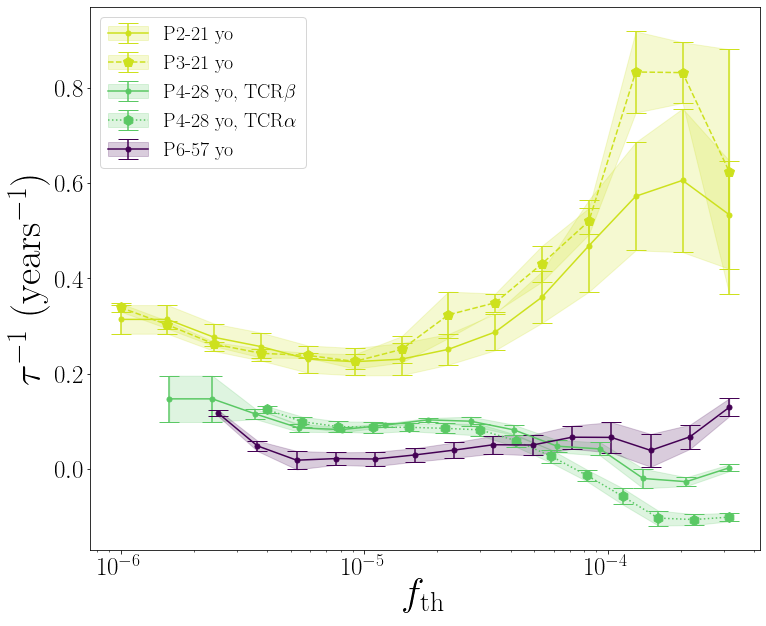

In [10]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Helvetica"]})


fig, ax = plt.subplots(1,1, figsize = (12,10))
f_thresh_vec = np.logspace(-6, -3.5, 20)


P3 = ax.errorbar(f_thresh_vec_twins, -A_P3, yerr = A_P3_err , capsize = 10, color = cmap(trans(21/57)), linestyle= '-', marker = '.', markersize = 10)
P3_shade = ax.fill_between(f_thresh_vec_twins, -A_P3 - A_P3_err, -A_P3 + A_P3_err , color= cmap(trans(21/57)), alpha = 0.2)

P4 = ax.errorbar(f_thresh_vec_twins, -A_P4, yerr = A_P4_err , capsize = 10, color= cmap(trans(21/57)), linestyle= '--', marker = 'p', markersize = 10)
P4_shade = ax.fill_between(f_thresh_vec_twins, -A_P4 - A_P4_err, -A_P4 + A_P4_err , color= cmap(trans(21/57)), alpha = 0.2)

P6b = ax.errorbar(f_thresh_vec_P6, -A_P6_beta, yerr = A_P6_beta_err , capsize = 10, color= cmap(trans(28/57)), linestyle= '-', marker = '.', markersize = 10)
P6b_shade = ax.fill_between(f_thresh_vec_P6, -A_P6_beta - A_P6_beta_err, -A_P6_beta + A_P6_beta_err , color= cmap(trans(28/57)), alpha = 0.2)

P6a = ax.errorbar(f_thresh_vec_P6_alpha, -A_P6_alpha, yerr = A_P6_alpha_err , capsize = 10, color= cmap(trans(28/57)), linestyle= 'dotted', marker = 'h', markersize = 10)
P6a_shade = ax.fill_between(f_thresh_vec_P6_alpha, -A_P6_alpha - A_P6_alpha_err, -A_P6_alpha + A_P6_alpha_err , color= cmap(trans(28/57)), alpha = 0.2)

P9 = ax.errorbar(f_thresh_vec_P9, -A_P9, yerr = A_P9_err , capsize = 10, color = cmap(trans(57/57)), linestyle= '-', marker = '.', markersize = 10)
P9_shade = ax.fill_between(f_thresh_vec_P9, -A_YB - A_P9_err, -A_P9 + A_P9_err , color= cmap(trans(57/57)), alpha = 0.2)


ax.set_xlabel(r'$ f_{\rm{th}}$', fontsize = 40)
ax.set_ylabel(r'$  \tau^{-1} \ (\rm{years}^{-1})$', fontsize = 40)

ax.set_xscale('log')
ax.legend([(P3, P3_shade), (P4, P4_shade), (MPb, MPb_shade), (MPa, MPa_shade), (P9, P9_shade)], [r'P3-21 yo', r'P4-21 yo',  r'P6-28 yo, TCR$\beta$', r'P6-28 yo, TCR$\alpha$', r'P9-57 yo'], fontsize = 20)

## B/ Subplot theta vs fth

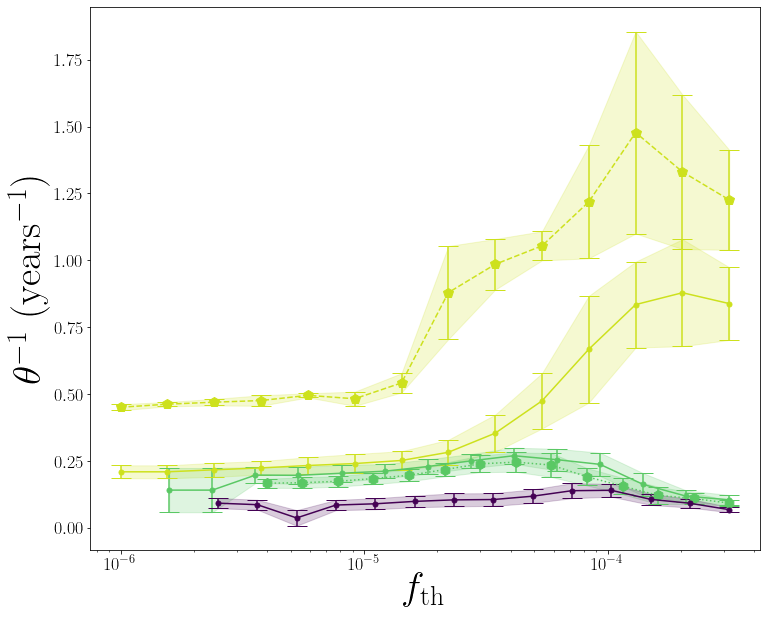

In [7]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
f_thresh_vec = np.logspace(-6, -3.5, 20)

S1 = ax.errorbar(f_thresh_vec_twins, B_S1, yerr = B_S1_err , capsize = 10, color = cmap(trans(21/57)), linestyle= '-', marker = '.', markersize = 10)
S1_shade = ax.fill_between(f_thresh_vec_twins, B_S1 - B_S1_err, B_S1 + B_S1_err , color= cmap(trans(21/57)), alpha = 0.2)

S2 = ax.errorbar(f_thresh_vec_twins, B_S2, yerr = B_S2_err , capsize = 10, color= cmap(trans(21/57)), linestyle= '--', marker = 'p', markersize = 10)
S2_shade = ax.fill_between(f_thresh_vec_twins, B_S2 - B_S2_err, B_S2 + B_S2_err , color= cmap(trans(21/57)), alpha = 0.2)

MPb = ax.errorbar(f_thresh_vec_MP, B_MP_beta, yerr = B_MP_beta_err , capsize = 10, color= cmap(trans(28/57)), linestyle= '-', marker = '.', markersize = 10)
MPb_shade = ax.fill_between(f_thresh_vec_MP, B_MP_beta - B_MP_beta_err, B_MP_beta + B_MP_beta_err , color= cmap(trans(28/57)), alpha = 0.2)

MPa = ax.errorbar(f_thresh_vec_MP_alpha, B_MPalpha, yerr = B_MPalpha_err , capsize = 10, color= cmap(trans(28/57)), linestyle= 'dotted', marker = 'h', markersize = 10)
MPa_shade = ax.fill_between(f_thresh_vec_MP_alpha, B_MPalpha - B_MPalpha_err, B_MPalpha + B_MPalpha_err , color= cmap(trans(28/57)), alpha = 0.2)

YB = ax.errorbar(f_thresh_vec_YB, B_YB, yerr = B_YB_err , capsize = 10, color = cmap(trans(57/57)), linestyle= '-', marker = '.', markersize = 10)
YB_shade = ax.fill_between(f_thresh_vec_YB, B_YB - B_YB_err, B_YB + B_YB_err , color= cmap(trans(57/57)), alpha = 0.2)


ax.set_xlabel(r'$ f_{\rm{th}}$', fontsize = 40)
ax.set_ylabel(r'$  \theta^{-1} \ (\rm{years}^{-1})$', fontsize = 40)

ax.set_xscale('log')

## Binning study

In [7]:
#S1
df_results_S1_F1_F1_binned_svec_10 = pd.read_csv('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/Analyse-binning-all-data/S_1_F1_F1_new_binning_n2_cond_1_nlim_1000', sep = '\t')
df_results_S1_F1_F2_binned_svec_10 = pd.read_csv('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/Analyse-binning-all-data/S_1_F1_F2_new_binning_n2_cond_1_nlim_1000', sep = '\t')
df_results_S1_F2_F1_binned_svec_10 = pd.read_csv('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/Analyse-binning-all-data/S_1_F2_F1_new_binning_n2_cond_1_nlim_1000', sep = '\t')
df_results_S1_F2_F2_binned_svec_10 = pd.read_csv('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/Analyse-binning-all-data/S_1_F2_F2_new_binning_n2_cond_1_nlim_1000', sep = '\t')

#S2
df_results_S2_F1_F1_binned_svec_10 = pd.read_csv('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/Analyse-binning-all-data/S_2_F1_F1_new_binning_n2_cond_1_nlim_1000', sep = '\t')
df_results_S2_F1_F2_binned_svec_10 = pd.read_csv('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/Analyse-binning-all-data/S_2_F1_F2_new_binning_n2_cond_1_nlim_1000', sep = '\t')
df_results_S2_F2_F1_binned_svec_10 = pd.read_csv('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/Analyse-binning-all-data/S_2_F2_F1_new_binning_n2_cond_1_nlim_1000', sep = '\t')
df_results_S2_F2_F2_binned_svec_10 = pd.read_csv('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/Analyse-binning-all-data/S_2_F2_F2_new_binning_n2_cond_1_nlim_1000', sep = '\t')

#MPbeta
df_results_MPbeta_F1_F1_binned_svec_10 = pd.read_csv('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/Analyse-binning-all-data/MPbeta_F1_F1_new_binning_n2_cond_1_nlim_1000', sep = '\t')
df_results_MPbeta_F1_F2_binned_svec_10 = pd.read_csv('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/Analyse-binning-all-data/MPbeta_F1_F2_new_binning_n2_cond_1_nlim_1000', sep = '\t')
df_results_MPbeta_F2_F1_binned_svec_10 = pd.read_csv('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/Analyse-binning-all-data/MPbeta_F2_F1_new_binning_n2_cond_1_nlim_1000', sep = '\t')
df_results_MPbeta_F2_F2_binned_svec_10 = pd.read_csv('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/Analyse-binning-all-data/MPbeta_F2_F2_new_binning_n2_cond_1_nlim_1000', sep = '\t')

#MPalpha
df_results_MPalpha_F1_F1_binned_svec_10 = pd.read_csv('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/Analyse-binning-all-data/MPalpha_F1_F1_new_binning_n2_cond_1_nlim_1000', sep = '\t')
df_results_MPalpha_F1_F2_binned_svec_10 = pd.read_csv('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/Analyse-binning-all-data/MPalpha_F1_F2_new_binning_n2_cond_1_nlim_1000', sep = '\t')
df_results_MPalpha_F2_F1_binned_svec_10 = pd.read_csv('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/Analyse-binning-all-data/MPalpha_F2_F1_new_binning_n2_cond_1_nlim_1000', sep = '\t')
df_results_MPalpha_F2_F2_binned_svec_10 = pd.read_csv('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/Analyse-binning-all-data/MPalpha_F2_F2_new_binning_n2_cond_1_nlim_1000', sep = '\t')

#YB
df_results_YB_F1_binned_svec_10 = pd.read_csv('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/Analyse-binning-all-data/YB_F1_new_binning_n2_cond_1_nlim_1000', sep = '\t')
df_results_YB_F2_binned_svec_10 = pd.read_csv('/Users/bensouda/Documents/PhD/TCR-dynamics/Codes_and_notebooks/Analyse-binning-all-data/YB_F2_new_binning_n2_cond_1_nlim_1000', sep = '\t')

In [8]:
A_S1_bin_all_svec_10 = np.vstack([df_results_S1_F1_F1_binned_svec_10['A'],df_results_S1_F1_F2_binned_svec_10['A'], df_results_S1_F2_F1_binned_svec_10['A'],df_results_S1_F2_F2_binned_svec_10['A']])
t = (730-45)/365
A_S1_bin_mean_svec_10 = np.mean(A_S1_bin_all_svec_10/t, axis = 0)
A_S1_bin_err_svec_10 = np.std(A_S1_bin_all_svec_10/t, axis = 0)

B_S1_bin_all_svec_10 = np.vstack([df_results_S1_F1_F1_binned_svec_10['B'],df_results_S1_F1_F2_binned_svec_10['B'], df_results_S1_F2_F1_binned_svec_10['B'],df_results_S1_F2_F2_binned_svec_10['B']])
t = (730-45)/365
B_S1_bin_mean_svec_10 = np.mean(B_S1_bin_all_svec_10/t, axis = 0)
B_S1_bin_err_svec_10 = np.std(B_S1_bin_all_svec_10/t, axis = 0)

A_S2_bin_all_svec_10 = np.vstack([df_results_S2_F1_F1_binned_svec_10['A'],df_results_S2_F1_F2_binned_svec_10['A'], df_results_S2_F2_F1_binned_svec_10['A'],df_results_S2_F2_F2_binned_svec_10['A']])
t = (730-45)/365
A_S2_bin_mean_svec_10 = np.mean(A_S2_bin_all_svec_10/t, axis = 0)
A_S2_bin_err_svec_10 = np.std(A_S2_bin_all_svec_10/t, axis = 0)

B_S2_bin_all_svec_10 = np.vstack([df_results_S2_F1_F1_binned_svec_10['B'],df_results_S2_F1_F2_binned_svec_10['B'], df_results_S2_F2_F1_binned_svec_10['B'],df_results_S2_F2_F2_binned_svec_10['B']])
t = (730-45)/365
B_S2_bin_mean_svec_10 = np.mean(B_S2_bin_all_svec_10/t, axis = 0)
B_S2_bin_err_svec_10 = np.std(B_S2_bin_all_svec_10/t, axis = 0)

A_MPbeta_bin_all_svec_10 = np.vstack([df_results_MPbeta_F1_F1_binned_svec_10['A'],df_results_MPbeta_F1_F2_binned_svec_10['A'], df_results_MPbeta_F2_F1_binned_svec_10['A'], df_results_MPbeta_F2_F2_binned_svec_10['A']])
t = 1.5
A_MPbeta_bin_mean_svec_10 = np.mean(A_MPbeta_bin_all_svec_10/t, axis = 0)
A_MPbeta_bin_err_svec_10 = np.std(A_MPbeta_bin_all_svec_10/t, axis = 0)

B_MPbeta_bin_all_svec_10 = np.vstack([df_results_MPbeta_F1_F1_binned_svec_10['B'],df_results_MPbeta_F1_F2_binned_svec_10['B'], df_results_MPbeta_F2_F1_binned_svec_10['B'],df_results_MPbeta_F2_F2_binned_svec_10['B']])
t = 1.5
B_MPbeta_bin_mean_svec_10 = np.mean(B_MPbeta_bin_all_svec_10/t, axis = 0)
B_MPbeta_bin_err_svec_10 = np.std(B_MPbeta_bin_all_svec_10/t, axis = 0)

A_MPalpha_bin_all_svec_10 = np.vstack([df_results_MPalpha_F1_F1_binned_svec_10['A'],df_results_MPalpha_F1_F2_binned_svec_10['A'], df_results_MPalpha_F2_F1_binned_svec_10['A'], df_results_MPalpha_F2_F2_binned_svec_10['A']])
t = 1.5
A_MPalpha_bin_mean_svec_10 = np.mean(A_MPalpha_bin_all_svec_10/t, axis = 0)
A_MPalpha_bin_err_svec_10 = np.std(A_MPalpha_bin_all_svec_10/t, axis = 0)

B_MPalpha_bin_all_svec_10 = np.vstack([df_results_MPalpha_F1_F1_binned_svec_10['B'], df_results_MPalpha_F1_F2_binned_svec_10['B'], df_results_MPalpha_F2_F1_binned_svec_10['B'], df_results_MPalpha_F2_F2_binned_svec_10['B']])
t = 1.5
B_MPalpha_bin_mean_svec_10 = np.mean(B_MPalpha_bin_all_svec_10/t, axis = 0)
B_MPalpha_bin_err_svec_10 = np.std(B_MPalpha_bin_all_svec_10/t, axis = 0)

A_YB_bin_all_svec_10 = np.vstack([df_results_YB_F1_binned_svec_10['A'], df_results_YB_F2_binned_svec_10['A']])
t = 1
A_YB_bin_mean_svec_10 = np.mean(A_YB_bin_all_svec_10/t, axis = 0)
A_YB_bin_err_svec_10 = np.std(A_YB_bin_all_svec_10/t, axis = 0)

B_YB_bin_all_svec_10 = np.vstack([df_results_YB_F1_binned_svec_10['B'], df_results_YB_F2_binned_svec_10['B']])
t = 1
B_YB_bin_mean_svec_10 = np.mean(B_YB_bin_all_svec_10/t, axis = 0)
B_YB_bin_err_svec_10 = np.std(B_YB_bin_all_svec_10/t, axis = 0)

In [9]:
median_S1_F1_F1, median_S1_F1_F2, median_S1_F2_F1, median_S1_F2_F2 = np.array([  4. ,   7. ,  14. ,  34. , 173.5]), np.array([  4. ,   7. ,  14. ,  33. , 176.5]), np.array([  4.,   7.,  14.,  33., 164.]), np.array([  4.,   7.,  14.,  33., 165.])
median_S2_F1_F1, median_S2_F1_F2, median_S2_F2_F1, median_S2_F2_F2 = np.array([  4.,   7.,  14.,  34., 170.]), np.array([  4. ,   7. ,  14. ,  34. , 169.5]), np.array([  4.,   7.,  14.,  34., 169.]), np.array([  4.,   7.,  14.,  34., 171.])
median_MPb_F1_F1, median_MPb_F1_F2, median_MPb_F2_F1, median_MPb_F2_F2 = np.array([  3.,   7.,  14.,  32., 197.]), np.array([  3.,   7.,  14.,  32., 197.]), np.array([  3.,   7.,  14.,  31., 179.]), np.array([  3.,   7.,  14.,  31., 179.])
median_MPa_F1_F1, median_MPa_F1_F2, median_MPa_F2_F1, median_MPa_F2_F2 = np.array([  3. ,   7. ,  14. ,  31. , 207.5]), np.array([  3. ,   7. ,  14. ,  31. , 208.5]), np.array([  3. ,   7. ,  14. ,  31. , 238.5]), np.array([  3. ,   7. ,  14. ,  31. , 238.5])
median_YB_F1, median_YB_F2 = np.array([  3.,   7.,  14.,  31., 184.]), np.array([  3.,   7.,  14.,  31., 184.])

In [10]:
df_results_S1_F1_F1_binned_svec_10['median_n_thresh'] = median_S1_F1_F1[:-1]
df_results_S1_F1_F2_binned_svec_10['median_n_thresh'] = median_S1_F1_F2[:-1]
df_results_S1_F2_F1_binned_svec_10['median_n_thresh'] = median_S1_F2_F1[:-1]
df_results_S1_F2_F2_binned_svec_10['median_n_thresh'] = median_S1_F2_F2[:-1]

df_results_S2_F1_F1_binned_svec_10['median_n_thresh'] = median_S2_F1_F1[:-1]
df_results_S2_F1_F2_binned_svec_10['median_n_thresh'] = median_S2_F1_F2[:-1]
df_results_S2_F2_F1_binned_svec_10['median_n_thresh'] = median_S2_F2_F1[:-1]
df_results_S2_F2_F2_binned_svec_10['median_n_thresh'] = median_S2_F2_F2[:-1]

df_results_MPbeta_F1_F1_binned_svec_10['median_n_thresh'] = median_MPb_F1_F1[:-1]
df_results_MPbeta_F1_F2_binned_svec_10['median_n_thresh'] = median_MPb_F1_F2[:-1]
df_results_MPbeta_F2_F1_binned_svec_10['median_n_thresh'] = median_MPb_F2_F1[:-1]
df_results_MPbeta_F2_F2_binned_svec_10['median_n_thresh'] = median_MPb_F2_F2[:-1]

df_results_MPalpha_F1_F1_binned_svec_10['median_n_thresh'] = median_MPa_F1_F1[:-1]
df_results_MPalpha_F1_F2_binned_svec_10['median_n_thresh'] = median_MPa_F1_F2[:-1]
df_results_MPalpha_F2_F1_binned_svec_10['median_n_thresh'] = median_MPa_F2_F1[:-1]
df_results_MPalpha_F2_F2_binned_svec_10['median_n_thresh'] = median_MPa_F2_F2[:-1]

df_results_YB_F1_binned_svec_10['median_n_thresh'] = median_YB_F1[:-1]
df_results_YB_F2_binned_svec_10['median_n_thresh'] = median_YB_F2[:-1]

In [11]:
NreadsS1 = 1021398
NreadsS2 = 1792178
NreadsMPbeta = 754739
NreadsMPalpha = 681913.0
NreadsYB = 616835

In [12]:
f_bin_S1_F1_F1 = df_results_S1_F1_F1_binned_svec_10['median_n_thresh']/NreadsS1
f_bin_S2_F1_F1 = df_results_S2_F1_F1_binned_svec_10['median_n_thresh']/NreadsS2
f_bin_MPbeta_F1_F1 = df_results_MPbeta_F1_F1_binned_svec_10['median_n_thresh']/NreadsMPbeta
f_bin_MPalpha_F1_F1 = df_results_MPalpha_F1_F1_binned_svec_10['median_n_thresh']/NreadsMPalpha
f_bin_YB_F1 = df_results_YB_F1_binned_svec_10['median_n_thresh']/NreadsYB

f_bin_S1_F1_F1 = np.array(list(df_results_S1_F1_F1_binned_svec_10['median_n_thresh']/NreadsS1) + [median_S1_F1_F1[-1]/NreadsS1])
f_bin_S2_F1_F1 = np.array(list(df_results_S2_F1_F1_binned_svec_10['median_n_thresh']/NreadsS2) + [median_S2_F1_F1[-1]/NreadsS2])
f_bin_MPbeta_F1_F1 = np.array(list(df_results_MPbeta_F1_F1_binned_svec_10['median_n_thresh']/NreadsMPbeta) + [median_MPb_F1_F1[-1]/NreadsMPbeta])
f_bin_MPalpha_F1_F1 = np.array(list(df_results_MPalpha_F1_F1_binned_svec_10['median_n_thresh']/NreadsMPalpha) + [median_MPa_F1_F1[-1]/NreadsMPalpha])
f_bin_YB_F1 = np.array(list(df_results_YB_F1_binned_svec_10['median_n_thresh']/NreadsYB) + [median_YB_F1[-1]/NreadsYB])

In [13]:
A_S1_bin_mean_svec_10 = np.array(list(A_S1_bin_mean_svec_10) +[-0.49377423])
A_S2_bin_mean_svec_10 = np.array(list(A_S2_bin_mean_svec_10) + [-0.40199845])
A_MPbeta_bin_mean_svec_10 = np.array(list(A_MPbeta_bin_mean_svec_10) + [0.03388472])
A_MPalpha_bin_mean_svec_10 = np.array(list(A_MPalpha_bin_mean_svec_10) + [0.10023272])

A_YB_bin_mean_svec_10 = np.array(list(A_YB_bin_mean_svec_10) + [-0.03285757])

A_S1_bin_err_svec_10 = np.array(list(A_S1_bin_err_svec_10) +[0.08464006])
A_S2_bin_err_svec_10 = np.array(list(A_S2_bin_err_svec_10) + [0.0794995])
A_MPbeta_bin_err_svec_10 = np.array(list(A_MPbeta_bin_err_svec_10) + [0.03778824])
A_MPalpha_bin_err_svec_10 = np.array(list(A_MPalpha_bin_err_svec_10) + [0.0268121])
A_YB_bin_err_svec_10 = np.array(list(A_YB_bin_err_svec_10) + [0.03277006])


B_S1_bin_mean_svec_10 = np.array(list(B_S1_bin_mean_svec_10) +[0.71249946])
B_S2_bin_mean_svec_10 = np.array(list(B_S2_bin_mean_svec_10) + [1.08905068])
B_MPbeta_bin_mean_svec_10 = np.array(list(B_MPbeta_bin_mean_svec_10) + [0.15074629])
B_MPalpha_bin_mean_svec_10 = np.array(list(B_MPalpha_bin_mean_svec_10) + [0.11922472])
B_YB_bin_mean_svec_10 = np.array(list(B_YB_bin_mean_svec_10) + [0.10213565])

B_S1_bin_err_svec_10 = np.array(list(B_S1_bin_err_svec_10) +[0.20983421])
B_S2_bin_err_svec_10 = np.array(list(B_S2_bin_err_svec_10) + [0.04521522])
B_MPbeta_bin_err_svec_10 = np.array(list(B_MPbeta_bin_err_svec_10) + [0.01896811])
B_MPalpha_bin_err_svec_10 = np.array(list(B_MPalpha_bin_err_svec_10) + [0.02832616])
B_YB_bin_err_svec_10 = np.array(list(B_YB_bin_err_svec_10) + [0.02008712])

In [14]:
def func(x, a, b):
    return a*np.log(x) + b

# For A
xdata_S1 = f_bin_S1_F1_F1
ydata_S1_A = A_S1_bin_mean_svec_10
popt_S1_A, pcov_S1_A = curve_fit(func, xdata_S1, ydata_S1_A)

xdata_S2 = f_bin_S2_F1_F1[1:]
ydata_S2_A = A_S2_bin_mean_svec_10[1:]
popt_S2_A, pcov_S2_A = curve_fit(func, xdata_S2, ydata_S2_A)

xdata_MPbeta = f_bin_MPbeta_F1_F1
ydata_MP_Abeta = A_MPbeta_bin_mean_svec_10 
popt_MPbeta_A, pcov_MP_A = curve_fit(func, xdata_MPbeta, ydata_MP_Abeta)

xdata_MPalpha = f_bin_MPalpha_F1_F1
ydata_MPalpha_A = A_MPalpha_bin_mean_svec_10 
popt_MPalpha_A, pcov_MP_A = curve_fit(func, xdata_MPalpha, ydata_MPalpha_A)

xdata_YB = f_bin_YB_F1
ydata_YB_A = A_YB_bin_mean_svec_10
popt_YB_A, pcov_YB_A = curve_fit(func, xdata_YB, ydata_YB_A)

# For B

xdata_S1 = f_bin_S1_F1_F1
ydata_S1_B = B_S1_bin_mean_svec_10
popt_S1_B, pcov_S1_B = curve_fit(func, xdata_S1, ydata_S1_B)

xdata_S2 = f_bin_S2_F1_F1[1:]
ydata_S2_B = B_S2_bin_mean_svec_10 [1:]
popt_S2_B, pcov_S2_B = curve_fit(func, xdata_S2, ydata_S2_B)

xdata_MPbeta = f_bin_MPbeta_F1_F1
ydata_MP_Bbeta = B_MPbeta_bin_mean_svec_10 
popt_MPbeta_B, pcov_MP_B = curve_fit(func, xdata_MPbeta, ydata_MP_Bbeta)

xdata_MPalpha = f_bin_MPalpha_F1_F1
ydata_MPalpha_B = B_MPalpha_bin_mean_svec_10 
popt_MPalpha_B, pcov_MP_B = curve_fit(func, xdata_MPalpha, ydata_MPalpha_B)

xdata_YB = f_bin_YB_F1
ydata_YB_B = B_YB_bin_mean_svec_10
popt_YB_B, pcov_YB_B = curve_fit(func, xdata_YB, ydata_YB_B)

## C/ Binning study tau vs f

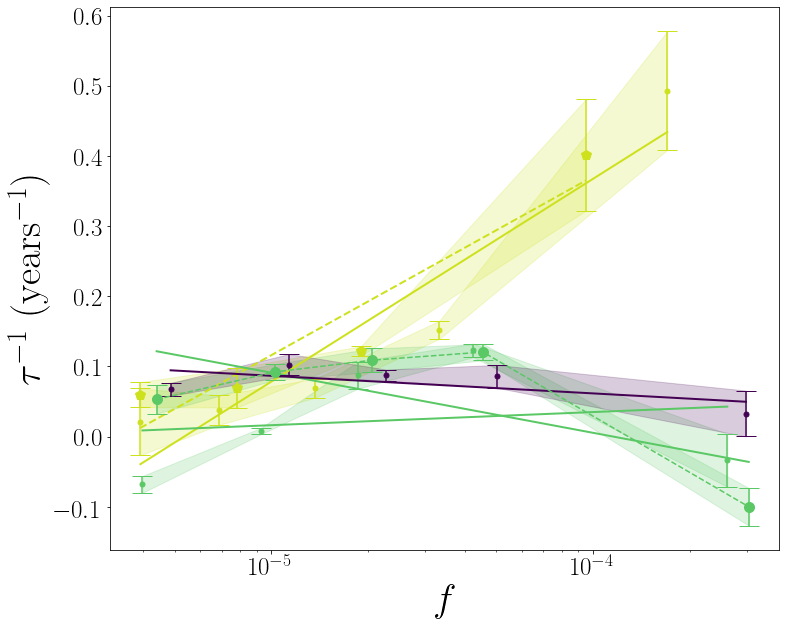

In [15]:
fig,ax = plt.subplots(figsize = (12,10))
S1 = ax.errorbar(f_bin_S1_F1_F1, -A_S1_bin_mean_svec_10, yerr = A_S1_bin_err_svec_10 , capsize = 10, color = cmap(trans(21/57)), linestyle= '', marker = '.', markersize = 10)
S1_shade = ax.fill_between(f_bin_S1_F1_F1, -A_S1_bin_mean_svec_10 - A_S1_bin_err_svec_10, -A_S1_bin_mean_svec_10 + A_S1_bin_err_svec_10 , color= cmap(trans(21/57)), alpha = 0.2, label = r'$P04 : \ 21yo$' )
plt.plot(xdata_S1, -func(xdata_S1, *popt_S1_A), '-', color = cmap(trans(21/57)), linewidth = 2)

#ax.step(n_thresh_step/NreadsS2, A_S2_step, color= colors[5], linestyle = '--', where='post')
S2 = ax.errorbar(f_bin_S2_F1_F1[1:], -A_S2_bin_mean_svec_10[1:], yerr = A_S2_bin_err_svec_10[1:] , capsize = 10, color = cmap(trans(21/57)), linestyle= '', marker = 'p', markersize = 10)
S2_shade = ax.fill_between(f_bin_S2_F1_F1[1:], -A_S2_bin_mean_svec_10[1:] - A_S2_bin_err_svec_10[1:], -A_S2_bin_mean_svec_10[1:] + A_S2_bin_err_svec_10[1:] , color= cmap(trans(21/57)), alpha = 0.2, label = r'$P05 : \ 21yo$' )
plt.plot(xdata_S2, -func(xdata_S2, *popt_S2_A), '-', color = cmap(trans(21/57)), linewidth = 2, linestyle = '--')

#ax.step(n_thresh_step_YB/NreadsMPbeta, A_MPbeta_step, color= colors[2], linestyle = '--', where='post')
MPbeta = ax.errorbar(f_bin_MPbeta_F1_F1, -A_MPbeta_bin_mean_svec_10, yerr = A_MPbeta_bin_err_svec_10 , capsize = 10, color = cmap(trans(28/57)), linestyle= '', marker = '.', markersize = 10)
MPbeta_shade = ax.fill_between(f_bin_MPbeta_F1_F1, -A_MPbeta_bin_mean_svec_10 - A_MPbeta_bin_err_svec_10, -A_MPbeta_bin_mean_svec_10 + A_MPbeta_bin_err_svec_10, color= cmap(trans(28/57)), alpha = 0.2, label = r'$P06 : \ 28yo$' )
plt.plot(xdata_MPbeta, -func(xdata_MPbeta, *popt_MPbeta_A), '-', color = cmap(trans(28/57)), linewidth = 2)

MPalpha = ax.errorbar(f_bin_MPalpha_F1_F1, -A_MPalpha_bin_mean_svec_10, yerr = A_MPalpha_bin_err_svec_10 , capsize = 10, color = cmap(trans(28/57)), linestyle= '--', marker = 'o', markersize = 10)
MPalpha_shade = ax.fill_between(f_bin_MPalpha_F1_F1, -A_MPalpha_bin_mean_svec_10 - A_MPalpha_bin_err_svec_10, -A_MPalpha_bin_mean_svec_10 + A_MPalpha_bin_err_svec_10, color= cmap(trans(28/57)), alpha = 0.2, label = r'$P06 : \ 28yo$' )
plt.plot(xdata_MPalpha, -func(xdata_MPalpha, *popt_MPalpha_A), '-', color = cmap(trans(28/57)), linewidth = 2)

#ax.step(n_thresh_step_YB/NreadsYB, A_YB_step, color= colors[1], linestyle = '--', where='post')
YB = ax.errorbar(f_bin_YB_F1, -A_YB_bin_mean_svec_10, yerr = A_YB_bin_err_svec_10 , capsize = 10, color = cmap(trans(57/57)), linestyle= '', marker = '.', markersize = 10)
YB_shade = ax.fill_between(f_bin_YB_F1, -A_YB_bin_mean_svec_10 - A_YB_bin_err_svec_10, -A_YB_bin_mean_svec_10 + A_YB_bin_err_svec_10 , color= cmap(trans(57/57)), alpha = 0.2, label = r'$P03 : \ 57yo$' )
plt.plot(xdata_YB, -func(xdata_YB, *popt_YB_A), '-', color = cmap(trans(57/57)), linewidth = 2)

ax.set_xlabel(r'$f$', fontsize = 40)
ax.set_ylabel(r'$  \tau^{-1} \ (\rm{years}^{-1})$', fontsize = 40)
#ax.legend([(S1, S1_shade), (S2, S2_shade), (MPbeta, MPbeta_shade), (YB, YB_shade)], [r'$P04 : \ 21yo$' , r'$P05 : \ 21yo$', r'$P06 : \ 28yo$' , r'$P03 : \ 57yo$'], fontsize = 25, loc = 3)

plt.xscale('log')

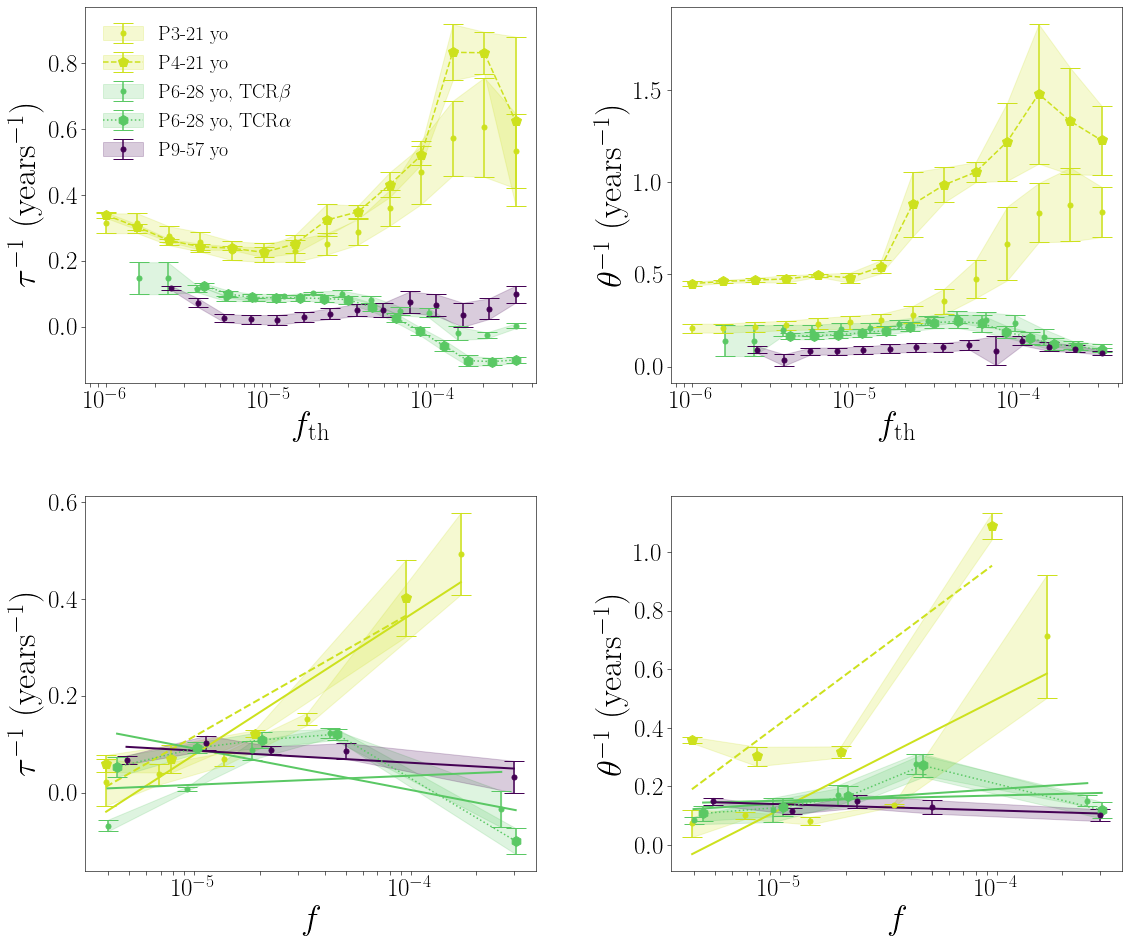

In [17]:
fig, axs = plt.subplots(2,2,figsize=(18,15))
plt.rc('text', usetex=True)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Helvetica"]})


# Subplot 1
f_thresh_vec = np.logspace(-6, -3.5, 20)

S1 = axs[0,0].errorbar(f_thresh_vec_twins, -A_S1, yerr = A_S1_err , capsize = 10, color = cmap(trans(21/57)), linestyle= '', marker = '.', markersize = 10)
S1_shade = axs[0,0].fill_between(f_thresh_vec_twins, -A_S1 - A_S1_err, -A_S1 + A_S1_err , color= cmap(trans(21/57)), alpha = 0.2)

S2 = axs[0,0].errorbar(f_thresh_vec_twins, -A_S2, yerr = A_S2_err , capsize = 10, color= cmap(trans(21/57)), linestyle= '--', marker = 'p', markersize = 10)
S2_shade = axs[0,0].fill_between(f_thresh_vec_twins, -A_S2 - A_S2_err, -A_S2 + A_S2_err , color= cmap(trans(21/57)), alpha = 0.2)

MPb = axs[0,0].errorbar(f_thresh_vec_MP, -A_MP_beta, yerr = A_MP_beta_err , capsize = 10, color= cmap(trans(28/57)), linestyle= '', marker = '.', markersize = 10)
MPb_shade = axs[0,0].fill_between(f_thresh_vec_MP, -A_MP_beta - A_MP_beta_err, -A_MP_beta + A_MP_beta_err , color= cmap(trans(28/57)), alpha = 0.2)

MPa = axs[0,0].errorbar(f_thresh_vec_MP_alpha, -A_MPalpha, yerr = A_MPalpha_err , capsize = 10, color= cmap(trans(28/57)), linestyle= 'dotted', marker = 'h', markersize = 10)
MPa_shade = axs[0,0].fill_between(f_thresh_vec_MP_alpha, -A_MPalpha - A_MPalpha_err, -A_MPalpha + A_MPalpha_err , color= cmap(trans(28/57)), alpha = 0.2)

YB = axs[0,0].errorbar(f_thresh_vec_YB, -A_YB, yerr = A_YB_err , capsize = 10, color = cmap(trans(57/57)), linestyle= '', marker = '.', markersize = 10)
YB_shade = axs[0,0].fill_between(f_thresh_vec_YB, -A_YB - A_YB_err, -A_YB + A_YB_err , color= cmap(trans(57/57)), alpha = 0.2)

axs[0,0].set_xlabel(r'$ f_{\rm{th}}$', fontsize = 35)
axs[0,0].set_ylabel(r'$  \tau^{-1} \ (\rm{years}^{-1})$', fontsize = 35)

axs[0,0].set_xscale('log')
axs[0,0].legend([(S1, S1_shade), (S2, S2_shade), (MPb, MPb_shade), (MPa, MPa_shade), (YB, YB_shade)], [r'P3-21 yo', r'P4-21 yo',  r'P6-28 yo, TCR$\beta$', r'P6-28 yo, TCR$\alpha$', r'P9-57 yo'], fontsize = 20, frameon = False)
axs[0,0].xaxis.set_tick_params('both', length=4, width=.6)
axs[0,0].yaxis.set_tick_params('both', length=4, width=.6)
plt.setp(axs[0,0].spines.values(), linewidth=.6)


#Subplot 2

S1 = axs[0,1].errorbar(f_thresh_vec_twins, B_S1, yerr = B_S1_err , capsize = 10, color = cmap(trans(21/57)), linestyle= '', marker = '.', markersize = 10)
S1_shade = axs[0,1].fill_between(f_thresh_vec_twins, B_S1 - B_S1_err, B_S1 + B_S1_err , color= cmap(trans(21/57)), alpha = 0.2)

S2 = axs[0,1].errorbar(f_thresh_vec_twins, B_S2, yerr = B_S2_err , capsize = 10, color= cmap(trans(21/57)), linestyle= '--', marker = 'p', markersize = 10)
S2_shade = axs[0,1].fill_between(f_thresh_vec_twins, B_S2 - B_S2_err, B_S2 + B_S2_err , color= cmap(trans(21/57)), alpha = 0.2)

MPb = axs[0,1].errorbar(f_thresh_vec_MP, B_MP_beta, yerr = B_MP_beta_err , capsize = 10, color= cmap(trans(28/57)), linestyle= '', marker = '.', markersize = 10)
MPb_shade = axs[0,1].fill_between(f_thresh_vec_MP, B_MP_beta - B_MP_beta_err, B_MP_beta + B_MP_beta_err , color= cmap(trans(28/57)), alpha = 0.2)

MPa = axs[0,1].errorbar(f_thresh_vec_MP_alpha, B_MPalpha, yerr = B_MPalpha_err , capsize = 10, color= cmap(trans(28/57)), linestyle= 'dotted', marker = 'h', markersize = 10)
MPa_shade = axs[0,1].fill_between(f_thresh_vec_MP_alpha, B_MPalpha - B_MPalpha_err, B_MPalpha + B_MPalpha_err , color= cmap(trans(28/57)), alpha = 0.2)

YB = axs[0,1].errorbar(f_thresh_vec_YB, B_YB, yerr = B_YB_err , capsize = 10, color = cmap(trans(57/57)), linestyle= '', marker = '.', markersize = 10)
YB_shade = axs[0,1].fill_between(f_thresh_vec_YB, B_YB - B_YB_err, B_YB + B_YB_err , color= cmap(trans(57/57)), alpha = 0.2)

axs[0,1].set_xlabel(r'$ f_{\rm{th}}$', fontsize = 35)
axs[0,1].set_ylabel(r'$  \theta^{-1} \ (\rm{years}^{-1})$', fontsize = 35)

axs[0,1].set_xscale('log')
axs[0,1].xaxis.set_tick_params('both', length=4, width=.6)
axs[0,1].yaxis.set_tick_params('both', length=4, width=.6)
plt.setp(axs[0,1].spines.values(), linewidth=.6)

# Subplot 3

axs[1,0].errorbar(f_bin_S1_F1_F1, -A_S1_bin_mean_svec_10, yerr = A_S1_bin_err_svec_10 , capsize = 10, color = cmap(trans(21/57)), linestyle= '', marker = '.', markersize = 10)
axs[1,0].fill_between(f_bin_S1_F1_F1, -A_S1_bin_mean_svec_10 - A_S1_bin_err_svec_10, -A_S1_bin_mean_svec_10 + A_S1_bin_err_svec_10 , color= cmap(trans(21/57)), alpha = 0.2, label = r'$P04 : \ 21yo$' )
axs[1,0].plot(xdata_S1, -func(xdata_S1, *popt_S1_A), '-', color = cmap(trans(21/57)), linewidth = 2)


axs[1,0].errorbar(f_bin_S2_F1_F1[1:], -A_S2_bin_mean_svec_10[1:], yerr = A_S2_bin_err_svec_10[1:] , capsize = 10, color = cmap(trans(21/57)), linestyle= '', marker = 'p', markersize = 10)
axs[1,0].fill_between(f_bin_S2_F1_F1[1:], -A_S2_bin_mean_svec_10[1:] - A_S2_bin_err_svec_10[1:], -A_S2_bin_mean_svec_10[1:] + A_S2_bin_err_svec_10[1:] , color= cmap(trans(21/57)), alpha = 0.2, label = r'$P05 : \ 21yo$' )
axs[1,0].plot(xdata_S2, -func(xdata_S2, *popt_S2_A), '-', color = cmap(trans(21/57)), linewidth = 2, linestyle = '--')


axs[1,0].errorbar(f_bin_MPbeta_F1_F1, -A_MPbeta_bin_mean_svec_10, yerr = A_MPbeta_bin_err_svec_10 , capsize = 10, color = cmap(trans(28/57)), linestyle= '', marker = '.', markersize = 10)
axs[1,0].fill_between(f_bin_MPbeta_F1_F1, -A_MPbeta_bin_mean_svec_10 - A_MPbeta_bin_err_svec_10, -A_MPbeta_bin_mean_svec_10 + A_MPbeta_bin_err_svec_10, color= cmap(trans(28/57)), alpha = 0.2, label = r'$P06 : \ 28yo$' )
axs[1,0].plot(xdata_MPbeta, -func(xdata_MPbeta, *popt_MPbeta_A), '-', color = cmap(trans(28/57)), linewidth = 2)

axs[1,0].errorbar(f_bin_MPalpha_F1_F1, -A_MPalpha_bin_mean_svec_10, yerr = A_MPalpha_bin_err_svec_10 , capsize = 10, color = cmap(trans(28/57)), linestyle= 'dotted', marker = 'h', markersize = 10)
axs[1,0].fill_between(f_bin_MPalpha_F1_F1, -A_MPalpha_bin_mean_svec_10 - A_MPalpha_bin_err_svec_10, -A_MPalpha_bin_mean_svec_10 + A_MPalpha_bin_err_svec_10, color= cmap(trans(28/57)), alpha = 0.2, label = r'$P06 : \ 28yo$' )
axs[1,0].plot(xdata_MPalpha, -func(xdata_MPalpha, *popt_MPalpha_A), '-', color = cmap(trans(28/57)), linewidth = 2)


axs[1,0].errorbar(f_bin_YB_F1, -A_YB_bin_mean_svec_10, yerr = A_YB_bin_err_svec_10 , capsize = 10, color = cmap(trans(57/57)), linestyle= '', marker = '.', markersize = 10)
axs[1,0].fill_between(f_bin_YB_F1, -A_YB_bin_mean_svec_10 - A_YB_bin_err_svec_10, -A_YB_bin_mean_svec_10 + A_YB_bin_err_svec_10 , color= cmap(trans(57/57)), alpha = 0.2, label = r'$P03 : \ 57yo$' )
axs[1,0].plot(xdata_YB, -func(xdata_YB, *popt_YB_A), '-', color = cmap(trans(57/57)), linewidth = 2)

axs[1,0].set_xlabel(r'$f$', fontsize = 35)
axs[1,0].set_ylabel(r'$  \tau^{-1} \ (\rm{years}^{-1})$', fontsize = 35)
axs[1,0].set_xscale('log')

axs[1,0].xaxis.set_tick_params('both', length=4, width=.6)
axs[1,0].yaxis.set_tick_params('both', length=4, width=.6)
plt.setp(axs[1,0].spines.values(), linewidth=.6)



# Subplot 4

axs[1,1].errorbar(f_bin_S1_F1_F1, B_S1_bin_mean_svec_10, yerr = B_S1_bin_err_svec_10 , capsize = 10, color = cmap(trans(21/57)), linestyle= '', marker = '.', markersize = 10)
axs[1,1].fill_between(f_bin_S1_F1_F1, B_S1_bin_mean_svec_10 - B_S1_bin_err_svec_10, B_S1_bin_mean_svec_10 + B_S1_bin_err_svec_10 , color= cmap(trans(21/57)), alpha = 0.2, label = r'$P04 : \ 21yo$' )
axs[1,1].plot(xdata_S1, func(xdata_S1, *popt_S1_B), '-', color = cmap(trans(21/57)), linewidth = 2)


axs[1,1].errorbar(f_bin_S2_F1_F1[1:], B_S2_bin_mean_svec_10[1:], yerr = B_S2_bin_err_svec_10[1:] , capsize = 10, color = cmap(trans(21/57)), linestyle= '', marker = 'p', markersize = 10)
axs[1,1].fill_between(f_bin_S2_F1_F1[1:], B_S2_bin_mean_svec_10[1:] - B_S2_bin_err_svec_10[1:], B_S2_bin_mean_svec_10[1:] + B_S2_bin_err_svec_10[1:] , color= cmap(trans(21/57)), alpha = 0.2, label = r'$P05 : \ 21yo$' )
axs[1,1].plot(xdata_S2, func(xdata_S2, *popt_S2_B), '-', color = cmap(trans(21/57)), linewidth = 2, linestyle = '--')


axs[1,1].errorbar(f_bin_MPbeta_F1_F1, B_MPbeta_bin_mean_svec_10, yerr = B_MPbeta_bin_err_svec_10 , capsize = 10, color = cmap(trans(28/57)), linestyle= '', marker = '.', markersize = 10)
axs[1,1].fill_between(f_bin_MPbeta_F1_F1, B_MPbeta_bin_mean_svec_10 - B_MPbeta_bin_err_svec_10, B_MPbeta_bin_mean_svec_10 + B_MPbeta_bin_err_svec_10, color= cmap(trans(28/57)), alpha = 0.2, label = r'$P06 : \ 28yo$' )
axs[1,1].plot(xdata_MPbeta, func(xdata_MPbeta, *popt_MPbeta_B), '-', color = cmap(trans(28/57)), linewidth = 2)

axs[1,1].errorbar(f_bin_MPalpha_F1_F1, B_MPalpha_bin_mean_svec_10, yerr = B_MPalpha_bin_err_svec_10 , capsize = 10, color = cmap(trans(28/57)), linestyle= 'dotted', marker = 'h', markersize = 10)
axs[1,1].fill_between(f_bin_MPalpha_F1_F1, B_MPalpha_bin_mean_svec_10 - B_MPalpha_bin_err_svec_10, B_MPalpha_bin_mean_svec_10 + B_MPalpha_bin_err_svec_10, color= cmap(trans(28/57)), alpha = 0.2, label = r'$P06 : \ 28yo$' )
axs[1,1].plot(xdata_MPalpha, func(xdata_MPalpha, *popt_MPalpha_B), '-', color = cmap(trans(28/57)), linewidth = 2)

axs[1,1].errorbar(f_bin_YB_F1, B_YB_bin_mean_svec_10, yerr = B_YB_bin_err_svec_10 , capsize = 10, color = cmap(trans(57/57)), linestyle= '', marker = '.', markersize = 10)
axs[1,1].fill_between(f_bin_YB_F1, B_YB_bin_mean_svec_10 - B_YB_bin_err_svec_10, B_YB_bin_mean_svec_10 + B_YB_bin_err_svec_10 , color= cmap(trans(57/57)), alpha = 0.2, label = r'$P03 : \ 57yo$' )
axs[1,1].plot(xdata_YB, func(xdata_YB, *popt_YB_B), '-', color = cmap(trans(57/57)), linewidth = 2)

axs[1,1].set_xlabel(r'$f$', fontsize = 35)
axs[1,1].set_ylabel(r'$  \theta^{-1} \ (\rm{years}^{-1})$', fontsize = 35)

axs[1,1].set_xscale('log')
axs[1,1].xaxis.set_tick_params('both', length=4, width=.6)
axs[1,1].yaxis.set_tick_params('both', length=4, width=.6)
plt.setp(axs[1,1].spines.values(), linewidth=.6)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

#fig.savefig('/Users/bensouda/Documents/PhD/Codes_figures/Fig5.pdf', bbox_inches='tight')

plt.show()